# Домашнее задание №8. Линейная регрессия

## Задание 1
Самостоятельно выберите датасет на Kaggle, например, из этих: https://www.kaggle.com/datasets?tags=13405-Linear+Regression.

Загрузите его и осуществите предварительную обработку.

In [1]:
import pandas as pd

songs = pd.read_csv("song_data.csv", nrows=500).dropna()
songs.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## Задание 2
Выберите два столбца: наблюдаемые и предсказываемые значения.

Постройте диаграмму рассеяния (scatter plot), вычислите коэффициент корреляции.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def make_plot(x, y, xname, yname, coeff=np.nan, inter=np.nan):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    if not np.isnan(coeff) and not np.isnan(inter):
        line_x = np.linspace(min(x), max(x), 100)
        line_y = coeff * line_x + inter
        plt.plot(line_x, line_y, color='red')
    plt.xlabel(f'{xname}')
    plt.ylabel(f'{yname}')   
    plt.grid()
    plt.show()

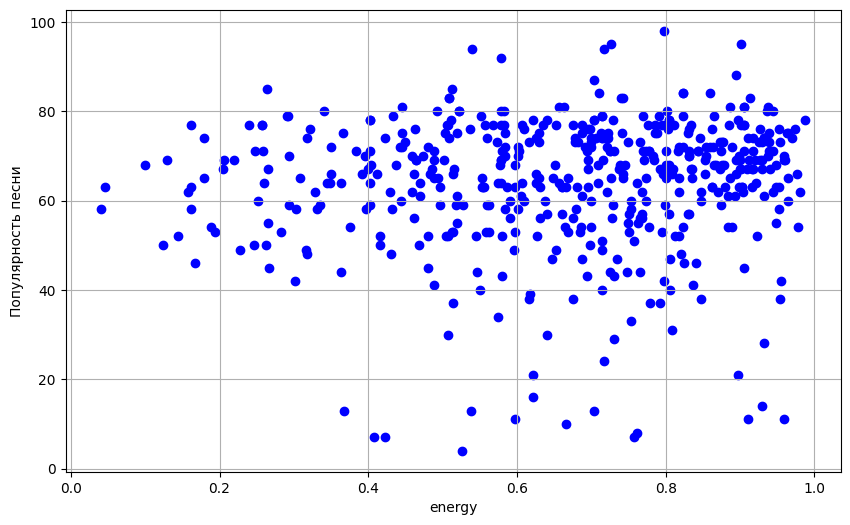

In [4]:
X = songs['energy']
Y = songs['song_popularity']
make_plot(X, Y, 'energy', 'Популярность песни')

In [5]:
print(f"Коэффициент корреляции между energy и song_popularity: {songs['energy'].corr(songs['song_popularity']):.2f}")
print(f"Коэффициент корреляции между danceability и song_popularity: {songs['danceability'].corr(songs['song_popularity']):.2f}")
print(f"Коэффициент корреляции между instrumentalness и song_popularity: {songs['instrumentalness'].corr(songs['song_popularity']):.2f}")
print(f"Коэффициент корреляции между speechiness и song_popularity: {songs['speechiness'].corr(songs['song_popularity']):.2f}")
print(f"Коэффициент корреляции между tempo и song_popularity: {songs['tempo'].corr(songs['song_popularity']):.2f}")

Коэффициент корреляции между energy и song_popularity: 0.08
Коэффициент корреляции между danceability и song_popularity: -0.00
Коэффициент корреляции между instrumentalness и song_popularity: -0.15
Коэффициент корреляции между speechiness и song_popularity: 0.01
Коэффициент корреляции между tempo и song_popularity: -0.09


## Задание 3

Разделите данные на обучающую и тестовую выборку. Постройте для обучающей выборки линейную регрессию: самостоятельно или воспользовавшись средствами библиотеки sklearn.

Постройте найденную прямую на диаграмме рассеяния, вычислите коэффициент детерминации на тестовой выборке.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)  

LinearRegression()

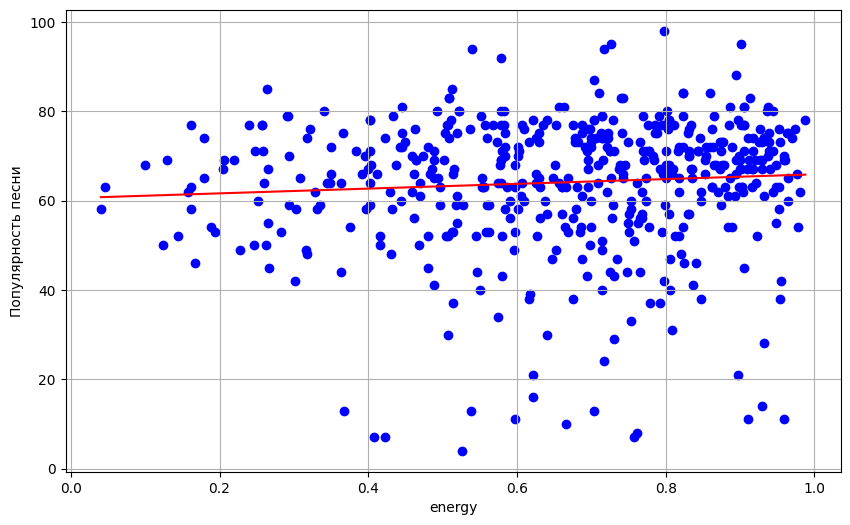

In [8]:
make_plot(X, Y, 'energy', 'Популярность песни', model.coef_, model.intercept_)

In [9]:
y_pred = np.array(model.predict(np.array(x_test).reshape(-1,1)))

r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  -0.004485736273455387


## Задание 4
Рассмотрите теперь несколько столбцов в качестве признаков, постройте множественную линейную регрессию и вычислите коэффициент детерминации в этом случае.

In [10]:
import statsmodels.api as sm

In [11]:
X = songs[['energy', 'speechiness', 'liveness']]
Y = songs['song_popularity']

In [12]:
def make_plot_2(X, Y, feature, ylabel, coefficients, intercept):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature], Y, color='blue', label='Данные')
    
    # Для линейной регрессии создадим линию предсказания
    x_vals = np.linspace(X[feature].min(), X[feature].max(), 100)
    y_vals = intercept + coefficients[0] * x_vals
    plt.plot(x_vals, y_vals, color='red', label='Предсказание')
    
    plt.xlabel(feature)
    plt.ylabel(ylabel)
    plt.title('Линейная регрессия: ' + feature + ' vs ' + ylabel)
    plt.legend()
    plt.grid()
    plt.show()

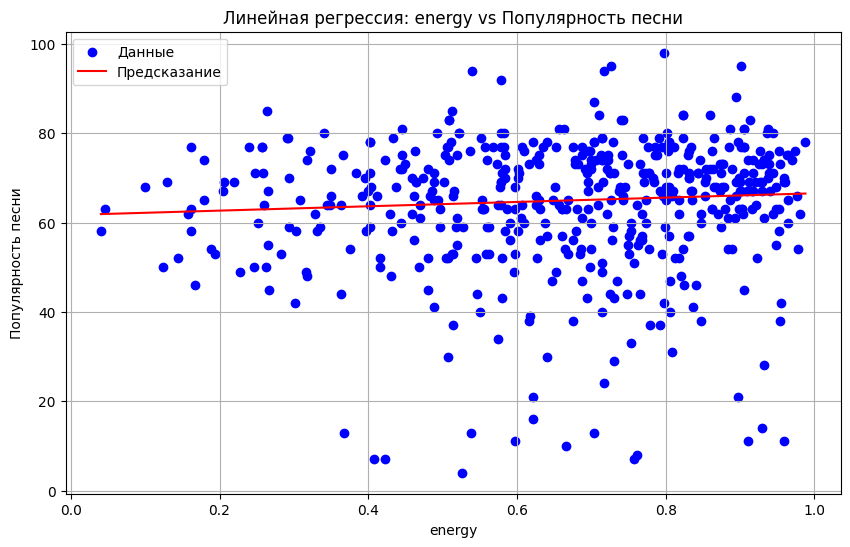

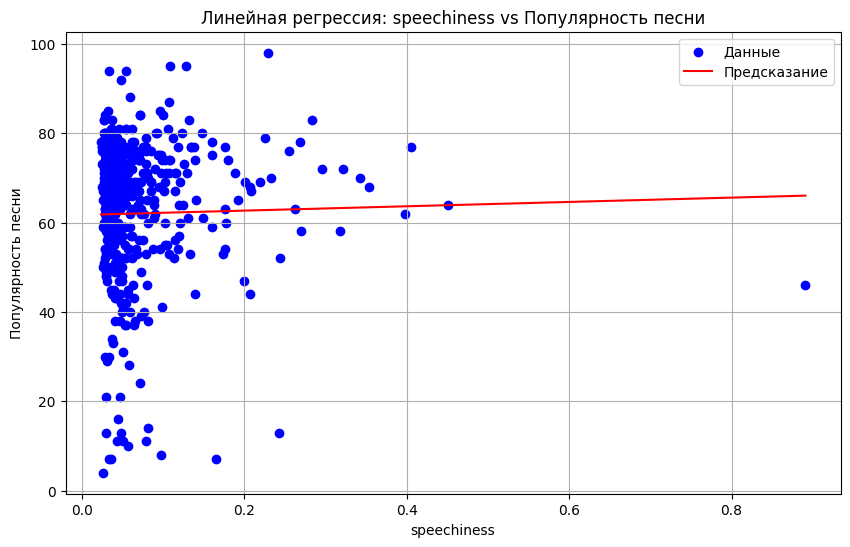

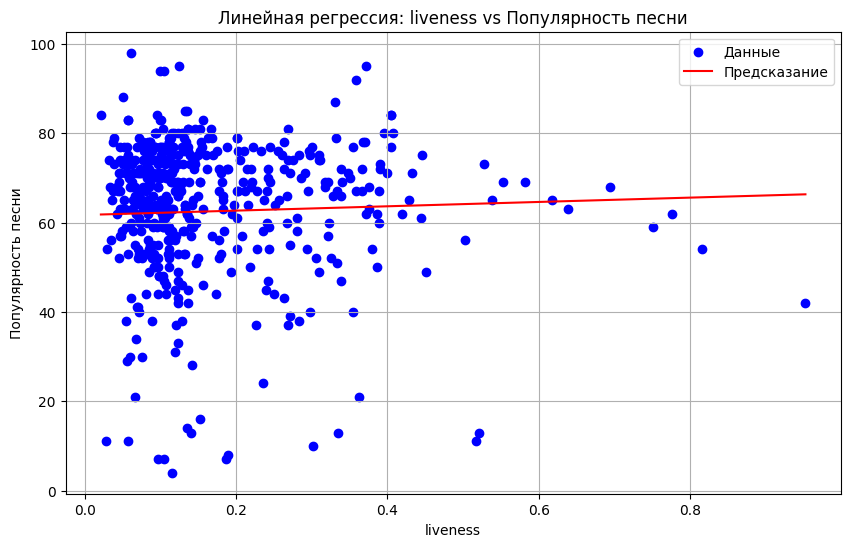

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)  

y_pred = model.predict(x_test)

make_plot_2(X, Y, 'energy', 'Популярность песни', model.coef_, model.intercept_)
make_plot_2(X, Y, 'speechiness', 'Популярность песни', model.coef_, model.intercept_)
make_plot_2(X, Y, 'liveness', 'Популярность песни', model.coef_, model.intercept_)

In [14]:
r_squared = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации (R²): {r_squared:.2f}')

Коэффициент детерминации (R²): 0.02
